|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')
df.columns

Index([' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval', 'real_fake'],
      dtype='object')

In [3]:
df.rename(columns = {' Num_posts':'Num_posts'}, inplace = True)

In [4]:
df.isnull().sum()

Num_posts                  0
Num_following              0
Num_followers              0
Biography_length           0
Picture_availability       0
Link_availability          0
Average_caption_length     0
Caption_zero               0
Non_image_percentage       0
Engagement_rate_like       0
Engagement_rate_comment    0
Location_tag_percentage    0
Average_hashtag_count      0
Promotional_keywords       0
Followers_keywords         0
Cosine_similarity          0
Post_interval              0
real_fake                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Num_posts                64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
# for col in df.columns:
#     print('{} : {}'.format(col,df[col].unique()))

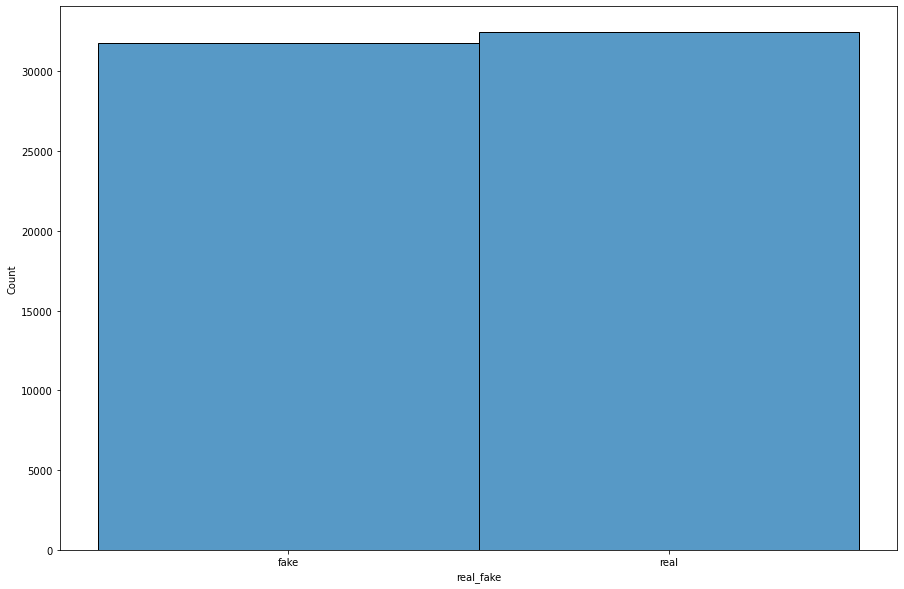

In [6]:
plt.figure(figsize=(15,10))
sns.histplot(df.real_fake,bins=10);

# Q3: Split tha dataset into training and testing

In [8]:
x = df.loc[:,'Num_posts' : 'Post_interval']
y = df['real_fake']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [56]:
def classify(x, y, model):
    
    #split data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    
    #print model name
    model_name = model.fit(X_train, y_train)
    
    #predict
    prediction = model.predict(X_test)
    
    #take real value sample
    Real_Values = np.array(y_test)
    
    print(f"Model name: {model_name},\n Accuracy: {accuracy_score(Real_Values, prediction)},\n Confusion Matrix: {confusion_matrix(Real_Values, prediction)} ")
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test, ax=ax);  
    plt.show()

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

Model name: SGDClassifier(),
 Accuracy: 0.7297395455017122,
 Confusion Matrix: [[7813 1697]
 [3512 6252]] 


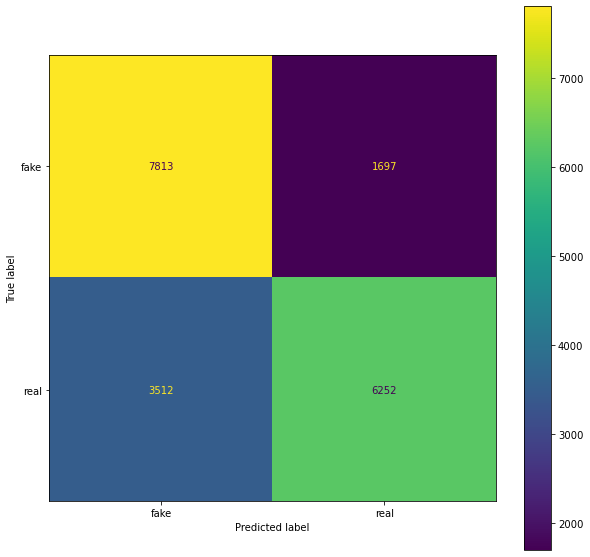

In [57]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
classify(x, y, sgd)

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [37]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
classify(x, y, lg)

Model name: LogisticRegression(),  Accuracy: 0.7635675002594168, Confusion Matrix: [[6702 2820]
 [1737 8015]] 


## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [38]:
from sklearn.linear_model import RidgeClassifier

rg = RidgeClassifier()
classify(x, y, rg)

Model name: RidgeClassifier(),  Accuracy: 0.8012348241153886, Confusion Matrix: [[7387 2110]
 [1721 8056]] 
